In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib inline
plt.style.use('fast')


import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)



In [ ]:
X=np.load("/content/X.npy")
y=np.load("/content/y.npy")#loading the digit dataset and labels(a subset of the MNIST dataset)

In [ ]:
print("The shape of X is:", str(X.shape))
print("The shape of y is:", str(y.shape))#the dataset contains 5000 examples of images , represented as 20 by 20 pixel values reshaped to a one dimensional array of 400 pixel values

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


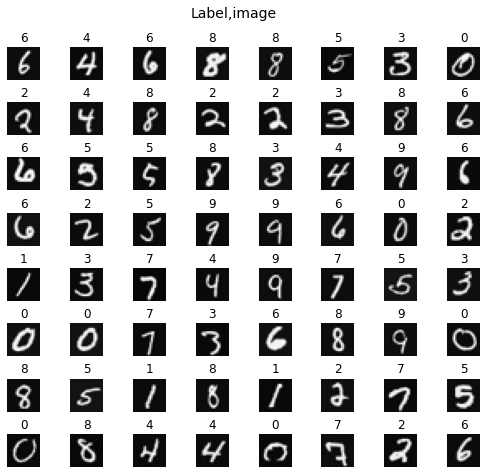

In [ ]:
m,n = X.shape
fig,axes=plt.subplots(8,8,figsize=(7,7))
fig.tight_layout(pad=0.13, rect=[0,0.03,1,0.91])

for i,ax in enumerate(axes.flat):
  random_index=np.random.randint(m)
  X_random_reshaped=X[random_index].reshape((20,20)).T
  ax.imshow(X_random_reshaped, cmap='gray')
  ax.set_title(y[random_index,0])
  ax.set_axis_off()

fig.suptitle("Label,image", fontsize=14)
plt.show()

In [ ]:
tf.random.set_seed(1234)#produces consistent results 
model=Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear')], name="my_model")


In [ ]:
model.summary()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
history=model.fit(X,y,epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 8.8730e-04
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 7.2629e-04
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 5.7107e-04
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 4.9609e-04
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 3.9171e-04
Epoch 11/40
157/157 [==============================] - 0s 3ms/step - loss: 3.5092e-04
Epoch 12/40
157/157 [==============================] - 0s 3ms/step - loss: 2.9560e-

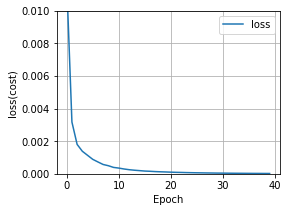

In [26]:
fig,ax=plt.subplots(1,1, figsize=(4,3))
ax.plot(history.history['loss'],label='loss')
ax.set_ylim([0,0.01])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss(cost)')
ax.legend()
ax.grid(True)
plt.show()